## Проектирование схемы: часть I

### Введение. Основные понятия в БД
<ol>
    <li><b>Схема БД</b> (<i>SQL</i>) - совокупность таблиц, атрибутов в них, а также тип и ограничения накладываемые на атрибуты таблиц (всё что создается с помощью <code>CREATE table</code>)</li>
    <li><b>Домен</b> - совокупность ограничений базового типа данных и логического выражения.</li>
    <li><b>Атрибут</b> - именованная характеристика - свойство сущности, определяемое на некотором типе данных или домене.</li>
    <li><b>Кортеж</b> - множество упорядоченных триплетов вида:<br>
               <code>(имя атрибута, тип данных или домен, значение)</code></li>
</ol>

### Ключи в БД
<ol>
    <li><b>Первичный ключ (primary key)</b> - столбец (или множество столбцов), функционально определяющий значения остальных столбцов<br><br>
    <b>Если строки совпадают по значению ключа</b>, тогда они также совпадают по значениям других столбцов. Таким образом, <b>одинаковых строк в таблице быть не может.</b><br><br>
    Правила хорошего тона при разработке структур баз данных, и чисто практические соображения должны побудить разработчика <b>всегда определять первичный ключ для таблицы базы данных</b>.</li><br>
    <li><b>Внешний ключ</b> - ограничение накладываемое на значение двух столбцов из двух таблиц. Назовем эти столбцы условно, <b>"откуда"</b> и <b>"куда"</b>.<br><br>
    Для определения <b>внешего ключа</b> необходимо, чтобы столбцы <b>"откуда"</b> и <b>"куда"</b> имели одинаковый тип, и чтобы столбец <b>"куда"</b> был ключом в своей таблице.
    <ul>
        <li>СУБД следит, чтобы значения столбца "откуда" принимали значения только из подножества значений столбца "куда"</li>
        <li>Если в столбце "куда" обновляется или удаляется значение, то в столбце "откуда" можно также произвести действие (например в случае удаление - каскадное удаление)</li>
    </li><br>
    <li><b>Вторичный ключ (secondary key)</b> - столбец, в котором содержаться значения первичного ключа другой таблицы; например БД онлайн магазин, чтобы избежать ситуации, когда у нас название категории товара или название бренда указано неверно, для каждого товара введём вторичный ключи: <b>id_category</b> и <b>id_brand</b>, данный ключи будут ссылаться на на первичные ключи в таблиц: <b>category</b> и <b>brand</b>.</li>    
    
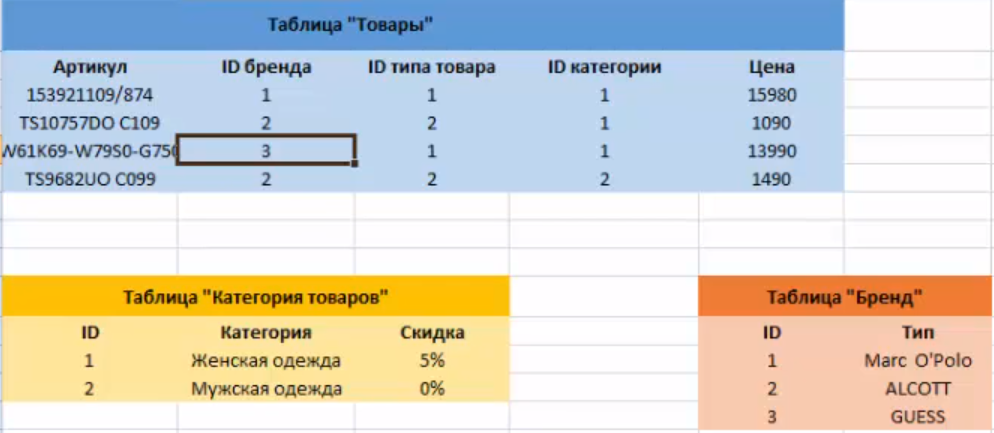
</ol>


### Декомпозиция
<b>Декомпозиция</b> - процесс разложения отдельных "фактов" (колонок) в отдельные таблицы.<br><br>
В процессе <b>декомпозиции</b> могу возникать различные проблемы, например, <i>создание новых данных или потеря исходных.</i><br>

<b>Безопасная декомпозиция</b>  или <i> декомпозиция без потерь</i> позволяет получить исходную таблицу соединением (<b>JOIN</b>) новых тоблиц.<br>

Для формального определения <i>безопасной декомпозиции</i> используется понятие <b>функциональной зависимости</b>.

### Нормализация и функциональная зависимость
<p>
    <b>Нормализация</b> - процесс создания набора отношений (таблиц) на основе некоторых требований.<br>
    <b>Задача нормализация: </b>найти наилучшую группировку атрибутов по отношениям в данной схеме.<br>
    <b>Процесс нормализации:</b>
    <ul>Идентификация отношений по:
        <li>Первичному (или потенциальному) ключу</li>
        <li>Функциональной зависимости</li>
    </ul>
    Проверка отдельных отношений на соответствие правилам нужной нормальной формы.<br>
    <b>Нормальные формы</b>:
    <ul>
        <li><b>ННФ</b> - ненормальная форма - без требований</li>
        <li><b>1НФ</b> - первая нормальная форма - обязательное требование реляционных БД; Формулировка: в каждой ячейке таблицы - одно значение</li>
        <li><b>2НФ, 3НФ, БКН</b> - устранение часто возникающих аномалий</li>
        <li><b>4НФ</b> - решение проблем с многозначной зависимостью</li>
        <li><b>5НФ</b> - решение проблем с зависимостью соединения</li> 
    </ul>
</p>

#### <code>Функциональная зависимость</code> описывает связь между атрибутами отношений

Если в отношении (таблице) один атрибут <b>функционально зависит</b> от другого, то каждое значение первого атрибута связано только с одним значением второго.<br>

В отношении атрибут <b>B</b> <b>полностью функционально зависит</b> от атрибута <b>A</b> если:
<ul>
    <li><b>B</b> функциально зависит от полного значения <b>A</b> (составные атрибуты)</li>
    <li><b>B</b> не зависит от подмножества полного значения <b>A</b></li>
</ul>
<b>Транзитивная зависимость:</b> если для атрибутов A, B и C существует зависимост A-->B и B-->C, тогда C транзитивно зависит от A через B:<b>( A --> B and B --> C ) ==> A --> C</b><br>
<b>P.S.</b> Если A функционально не зависит от B и С<br>

<b>Детерминант</b> - атрибут, от которого <b>полностью функционально зависит</b> некоторый другой атрибут.

## Основные нормальные формы
### Первая нормальная форма ( 1НФ )
<p>
    <b>Первая нормальная форма (1НФ)</b> - значения атрибутов атомарны, то есть если ни один из его атрибутов нельзя разделить на более простые атрибуты, которые соответствуют каким-то другим свойствам описываемой сущности.<br>
    <ul><b>Решение:</b>
        <li>Декомпозировать записи продублировав остальные данные</li>
        <li>Выделить списки в отдельную сущность</li>
    </ul>
</p>

### Вторая нормальная форма ( 2НФ )
<p>
    Требования к <b>второй нормальной форме</b>:
    <ul>
        <li>Отношение находится в 1НФ</li>
        <li>Каждый не ключевой атрибут полностью функционально зависит от первичного ключа</li>
    </ul>
Например здесь цена на машину <b>полностью функционально зависит</b> от марки и модели, но скидка зависит только от марки, т.е. от подмножества внешнего ключа, а не полностью.<br>
Данная таблиц
￼Приостановить
￼Без звука
Загрузка: 0%Прогресс: 0%
Оставшееся время -2:25
￼Скорость воспроизведения1x
￼1080px
￼Полноэкранный режим
а находится в <b>1НФ</b>:
![Screenshot%20from%202018-10-23%2020-33-04.png](attachment:Screenshot%20from%202018-10-23%2020-33-04.png)

Привести к <b>2НФ</b> можно с помощью декомпозиции на два отношения:

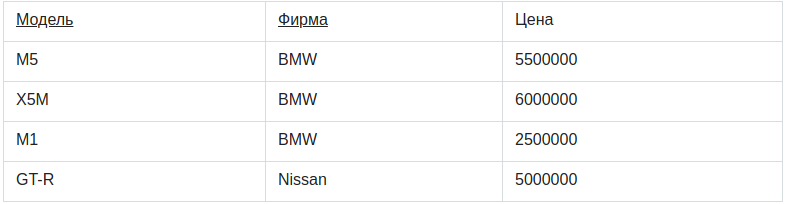

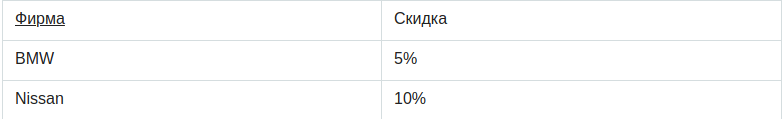
</p>

### Третья нормальная форма
<p>
    Требования к <b>третей нормальной форме</b>:
    <ul>
        <li>Отношение находится в 2НФ</li>
        <li>Нет атрибутов, не входящих в первичный ключ, который находятся в транзитивной зависимости от первичного ключа; или проще говоря - необходимо выносить все не ключевые поля, содержимое которых может относиться к нескольким записям таблицы в отдельные таблицы.</li>
    </ul>
    
### Нормальная форма Бойса-Кодда
<p>
    Требования к <b>нормальной форме Бойса-Кодда</b>:
    <ul>
        <li>Находится в 3НФ</li>
        <li>Каждый детерминант является потенциальным ключом (в любой нетривиальной функциональной зависимости)</li>
    </ul>
<b>Решения:</b>
<ul>
    <li>Найти все детерминанты и убедиться, что они являются потенциальными ключами, т.е. однозначно определяют запись в таблице.<br>Если есть потенциальные ключи, то вынести в отдельную сущность</li>
    <li>Убрать все лишние ключи: в таблице должен остаться только один первичный ключ</li>
</ul>
Если в нашей БД существует такие таблицы, в которых ключом является не детерминант => дальнейшая декомпозиция.

### Задача проектирования БД. Этапы проектирования. 
<ul>
    <li>Отображение объектов предметной области средствами модели данных</li>
    <li>Отображение связей объектов</li>
    <li>Достаточность представления предметной области для пользователей</li>
    <li>Формирование ограничений целостности</li>
    <li>Минимизация аномалий</li>
</ul>

### Концептуальное проектирование - построение семантической модели предметной области.
<b>ER - модель</b> - модель данных, позволяющая описывать концептуальные схемы предметной области.
<ol>
    <li><b>Выделение типов сущностей</b></li>
    <li><b>Определение связей</b></li>
    <li><b>Определение атрибутов</b></li>
    <li><b>Выбор ключей</b></li>
    <li><b>Проверка</b></li>
</ol>

### Логическое проектирование БД
Этап логического проектирования БД заключается в реализации схемы данных на основе выбранной модели. Для РМД может быть в значительной степени перех от концептуальной модели к логической автоматизирован.<br><br>
В случае с <i>РМД</i> <b>логическая модель</b> включает в себя:
<ul>
    <li>Набор схем отношений</li>
    <li>Выделенные первичные ключи</li>
    <li>Выделенные внешние ключи</li>
</ul>
<b>Правила перехода</b> от концептуальной модели к логической:
<ul>
    <li>Каждый простой тип сущности отображается в отношение</li>
    <li>Атрибуты ER-модели отображаются в атрибуты отношений</li>
    <li>Компоненты уникального идентификатора отображаются в первичный ключ</li>
    <li>Связь <b>one-to-one</b> отображается в виде <b>внешних ключей</b></li>
    <li>Связь <b>all-to-all</b> отображается c созданием дополнительного отношения</li>
    <li>Сложные связи (более, чем между двумя типами сущностей <b>декомпозируются</b> с выделением ноого типа сущности)</li>
    <li>Многозначные атрибуты декомпозируются с выделением нового типа сущности</li>
</ul>

#### А так же в рамках логического проектирования производится <code>нормализация</code>

### Физическое проектирование БД
Завершающим этапом процесса проектирования БД является физическое проектирование. На этоп этапе определяется физическая структура, соответствующая логической схеме, полученной на предыдущем этапе.<br>

По сути на этапе <b>физического проектирования</b> мы осуществляем перенос логической схему на конкретную СУБД:
<ul>
    <li>Определение т
￼Приостановить
￼Без звука
Загрузка: 0%Прогресс: 0%
Оставшееся время -2:25
￼Скорость воспроизведения1x
￼1080pxотношений
￼Полноэкранный режимотношений
ипов данных для атрибутов</li>
    <li>Определение допустимости неопределенных значений</li>
    <li>Выбор стратегии обработки исключительной ситуации при попытках нарушения ссылочной целостности</li>
    <li>Уточнение названий таблиц, атрибутотношенийов</li>
    <li>Хранение и/ли высисление производных атрибутов</li>
    <li>Реализация ограничений целостности, процедурная обработка</li>
    <li>Формирование описа
￼Приостановить
￼Без звука
Загрузка: 0%Прогресс: 0%отношений
Оставшееся время -2:25
￼Скорость воспроизведения1x
￼1080px
￼Полноэкранный режим
ния модели данных в рамках выбранной СУБД</li>
    <li>Формирование индексов</li>
    <li>Секционирование и партицирование</li>
</ul>



### Сущность и связь

При проектировании схемы БД используется средства моделирования, которое оперирует понятиями <b>сущность</b> и <b>связь</b>.<br>

<b>Сущность</b> - объект (запись) в таблице<br>
<b>Связь</b> - бинарная (чаще всего) ассоциация между объектами из разных таблиц<br>

<ul><b>Типы связей:</b>
    <li><b>Многие ко многим</b> - например таблица с учеными и таблица с конференциями, на которых ученые принимают участия; каждый ученые может принимать участие во многих конференциях.<br>
        Данная тип связей реализуется посредством <i>отдельной связывающей таблицы</i> c внешними ключами, ссылающимися на участников и конференции.</li>
    <li><b>Многие к одному</b> - например таблица с работниками университетов и самими университетами; в одном университете может работать несколько работников. В данном случае достаточно в таблице с работниками указать внешний ключ с именем университета, ссылающийся на ключ имя университета в таблице университет.</li> 
    <li><b>Один к одному </b> - </li> 
</ul>


### Ошибки про проектировании схемы
<b>Грабли №1:</b> зависимость от подключа<br>
<b>Грабли №2:</b> транзитивные зависимости<br>
<b>Грабли №3:</b> ключей может быть много (в таблице может быть не более одного первичного ключа, но сколько угодно потенциальных ключей)<br>
<b>Грабли №4:</b> связь 1:N вместо M:N<br>
<b>Грабли №5:</b> связь M:N вместо 1:N<br>
<b>Суррогатные ключи</b> используются для организации связи; сами по себе для пользователей СУБД они не несут никакой информации.

## Администрирование MySQL и оптимизаци запроса
### Сложность выполнения запросов. EXPLAIN
Современные реляционные СУБД, как правило могут объяснить пользователю, как именно будет выполняться тот или иной запрос. Это делается с помощью построения плана запроса, который затем будет использован, когда запрос будет непосредственно выполняться.<br><br>
<b>Стратегия составления плана</b>:
<ul>
    <li>Выбирается первая таблица: та, где меньше кортежей</li>
    <li>Выбираются первые условия для обработки, чтобы отфильтровать больше</li>
    <li>Выбираются ключи, чтобы как можно раньше как можно больше отфильтровать</li>
</ul>
<b>Таким образом план выполнения запроса, встраиваемые командой <code>EXPLAIN</code> используется для:</b>
<ul>
    <li>Проверки используемых индексов</li>
    <li>Проверки порядка выполнения операций в запросе для последующей оптимизации</li>
    <li>Определения количества кортежей, которые будут обработаны во время выполнения запроса</li>
</ul>

### Индексы
<b>Как хранятся данные?</b>
<ul>
    <li>Быстрее всего искать данные в упорядоченном списке</li>
    <li>Чтобы изменятьс данные в упорядоченном списке можно использовать дерево</li>
</ul>
<b>Кластерный индекс</b> - упорядоченное дерево, на листьях которого находятся сами данные
<b>Некластерный индексы</b> - структуры, встраиваемые вокруг данных с ссылками на кортеж